## Python library for handling time series data: Statsmodels
- Seasonality - Repeating trends
- Cyclical - Trends with no set repetition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# conda install statsmodels
import statsmodels.api as sm

In [3]:
df = sm.datasets.macrodata.load_pandas().data
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1','2009Q3'))

In [5]:
df.index = index
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


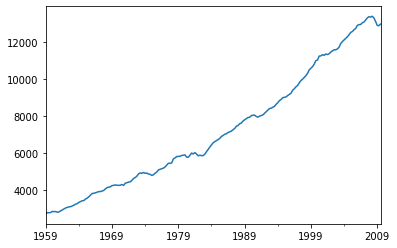

In [6]:
df['realgdp'].plot()

In [7]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df['realgdp']) # returns a tuple of cycles and trend

In [8]:
df['trend'] = gdp_trend

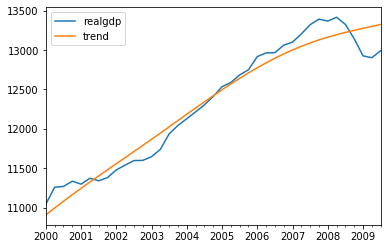

In [9]:
df[['realgdp','trend']]['2000-03-31':].plot()

### ETS Models (Error-Trend-Seasonality)
- Exponential Smoothing
- Trend Method Models
- ETS Decomposition

Time Series Decomposition with ETS (Error-Trend-Seasonality)

Visualizing the data based off its ETS is a good way to build an understanding of its behaviour

SMA - Simple Moving Averages

### EWMA - Exponentially Weighted Moving Averages

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occurred more recently.

The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size

Basic SMA has some "weaknesses":
- Smaller windows will lead to more noise, rather than signal
- It will always lag by the size of the window
- It will never reach to full peak of valley of the data due to the averaging

### EWMA Code Along

In [10]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month')

In [11]:
airline.dropna(inplace=True)

In [12]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


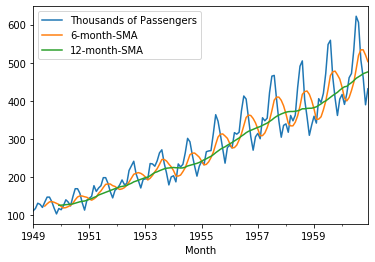

In [13]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.plot()

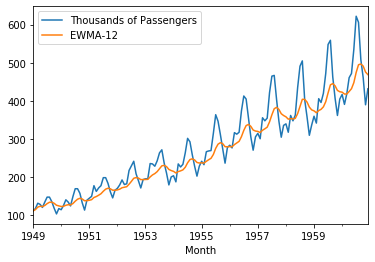

In [14]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers','EWMA-12']].plot()

### ETS Decomposition Code Along

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

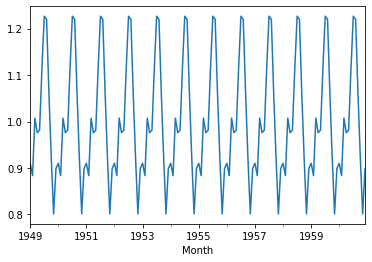

In [16]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='multiplicative')
result.seasonal.plot()

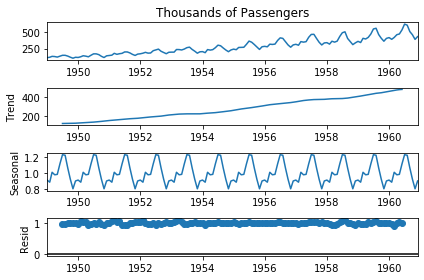

In [17]:
fig = result.plot()

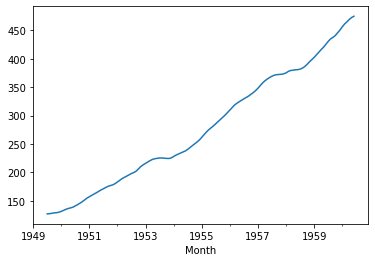

In [18]:
result = seasonal_decompose(airline['Thousands of Passengers'],model='additive')
result.trend.plot()

### One of the most common time series models, ARIMA
- ARIMA models often don't work well with historical stock data

AutoRegressive Integrated Moving Average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model

Both of these models (ARIMA and ARMA) are fitted to time series data either to better understand the data or to predict future points in the series (forecasting)

ARIMA models can be complex!

ARIMA (AutoRegressive Integrated Moving Averages)
- Non-seasonal ARIMA
- Seasonal ARIMA

ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step can be applied one or more times to eliminate the non-stationarity

Non-seasonal ARIMA models are generally denoted ARIMA(p,d,q) where parameters p,d and q are non-negative integers

#### Parts of ARIMA model
- *AR (p): Autoregression* 
   - A regression model that utilizes the dependent relationship between a current observation and observations over a previous period
- *I (d): Integrated*
   - Differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
- *MA (q): Moving Average*
   - A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations
   
#### Stationary vs Non-Stationary Data
A Stationary series has constant mean and variance over time

A Stationary data set will allow our model to predict that the mean and variance will be the same in future periods

Each differencing step comes at the cost of losing a row of data

Another common technique with seasonal ARIMA models is to combine both methods, taking the seasonal difference of the first difference

### AutoCorrelation Plots
An autocorrelation plot (also known as a Correlogram) shows the correlation of the series with itself, lagged by x time units. 

So the y axis is the correlation and the x axis is the number of time units of lag

- Gradual Decline
- Sharp Drop-off

If the autocorrelation plot shows positive autocorrelation at the first lag (lag-1), then it suggests to use the AR terms in relation to the lag

If the autocorrelation plot shows negative autocorrelation at the first lag, then it suggests using MA terms

- p: The number of lag observations included in the model
- d: The number of times that the raw observations are differenced
- q: The size of the moving average window, also called the order of moving average

In general, a **partial correlation** is a conditional correlation.

It is the correlation between two variables under the assumption that we know and take into account the values of some other set of variables

### ARIMA with Statsmodels
The general process for ARIMA models is the following:
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model
- Use the model to make predictions

In [19]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [20]:
df.columns = ['Month', 'Milk in Pounds per Cow']
df.drop(168,axis=0,inplace=True)
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [21]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


### Visualize the Data

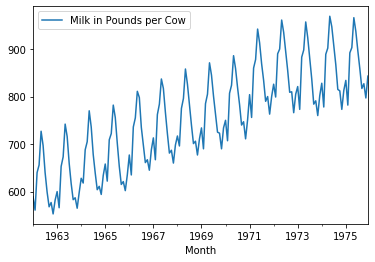

In [23]:
df.plot() #seasonal

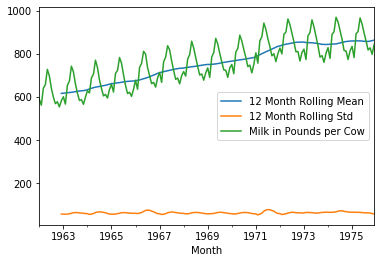

In [24]:
time_series = df['Milk in Pounds per Cow']
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

#### ETS decomposition allows us to see the individual parts!

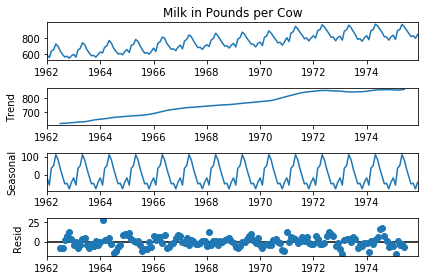

In [25]:
# from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(time_series)
fig = decomp.plot()

### Testing for Stationarity
In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
result = adfuller(df['Milk in Pounds per Cow'])

In [28]:
def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Observations used']
    
    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
        
    if result[1] <= 0.05:
        print("String evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print('Weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, it is non-stationary')

### Differencing
The first difference of a time series is the series of changes from one period to the next. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [29]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.3038115874221294
p-value : 0.6274267086030316
# of lags : 13
Num of Observations used : 154
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [30]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.0549955586530704
p-value : 0.030068004001785647
# of lags : 14
Num of Observations used : 152
String evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


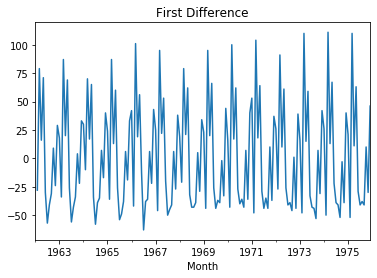

In [31]:
df['First Difference'].plot(title='First Difference')

In [32]:
df['Milk Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)
adf_check(df['Milk Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603301
p-value : 1.1126989332084581e-26
# of lags : 11
Num of Observations used : 154
String evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


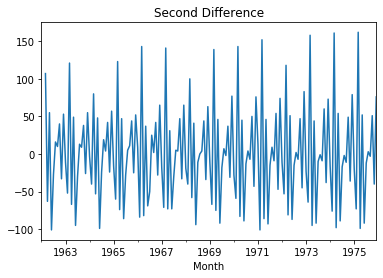

In [33]:
df['Milk Second Difference'].plot(title='Second Difference')

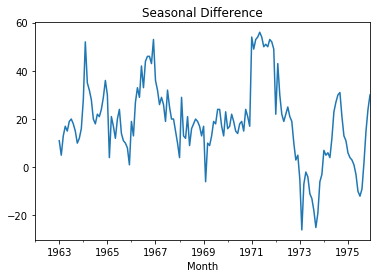

In [34]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)
df['Seasonal Difference'].plot(title='Seasonal Difference')

In [35]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.335419314359398
p-value : 0.1607988052771135
# of lags : 12
Num of Observations used : 143
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


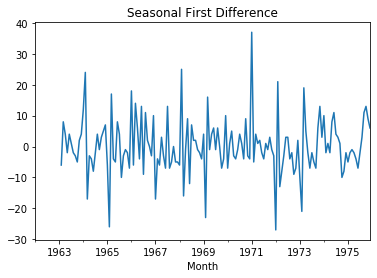

In [36]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)
df['Seasonal First Difference'].plot(title='Seasonal First Difference')

In [37]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.038002274921984
p-value : 1.8654234318788342e-05
# of lags : 11
Num of Observations used : 143
String evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


### Autocorrelation and Partial Autocorrelation Plots

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

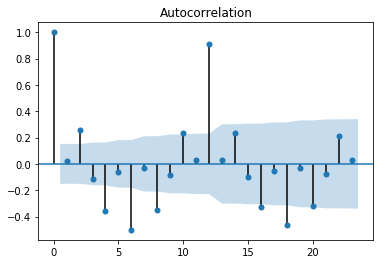

In [39]:
fig_first = plot_acf(df['First Difference'].dropna())

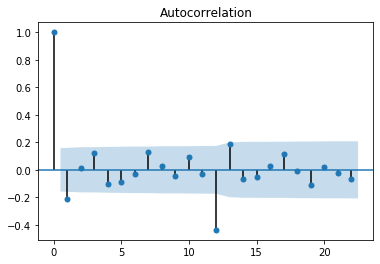

In [40]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

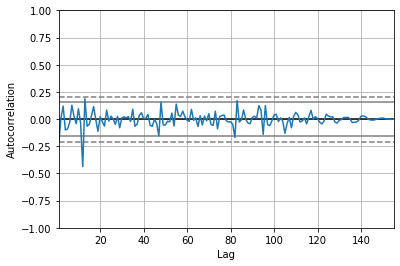

In [41]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Seasonal First Difference'].dropna())

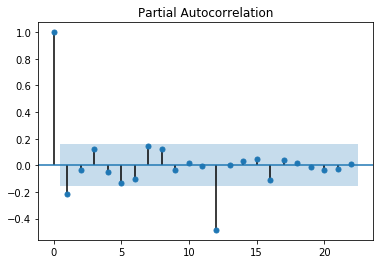

In [42]:
pacd_result = plot_pacf(df['Seasonal First Difference'].dropna())

### Using the Seasonal ARIMA model

In [43]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [44]:
# seasonal data!
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Sun, 26 Jul 2020   AIC                           1074.131
Time:                                      20:02:43   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

/Users/violetwei/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/violetwei/miniconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


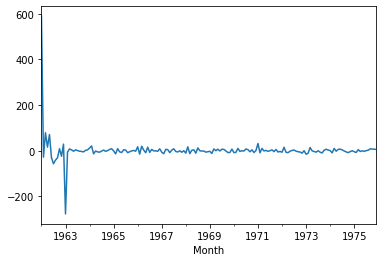

In [45]:
results.resid.plot() #residual error points

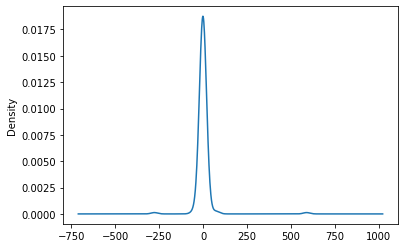

In [46]:
results.resid.plot(kind='kde')

#### Prediction of Future Values (Forecasting)

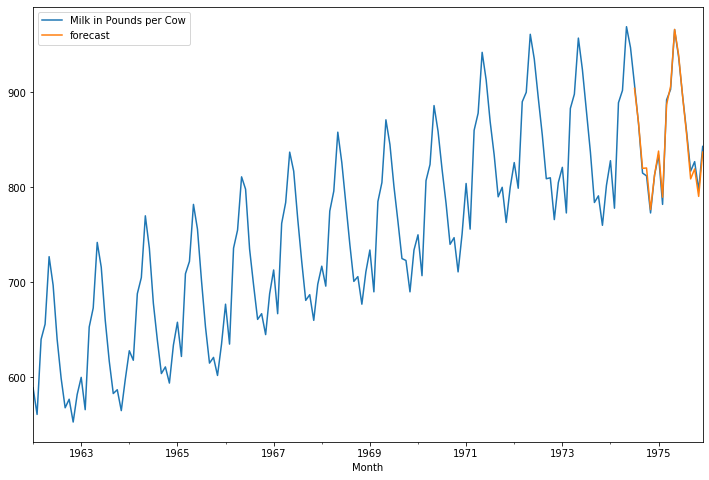

In [47]:
df['forecast'] = results.predict(start=150, end = 168)
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))

In [48]:
# Forecasting requires more time periods, so create them with pandas onto our original dataframe!
df.tail()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358617
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841268
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323183
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427500
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063646


In [49]:
from pandas.tseries.offsets import DateOffset

In [50]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df = pd.concat([df,future_dates_df])
future_df.head()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


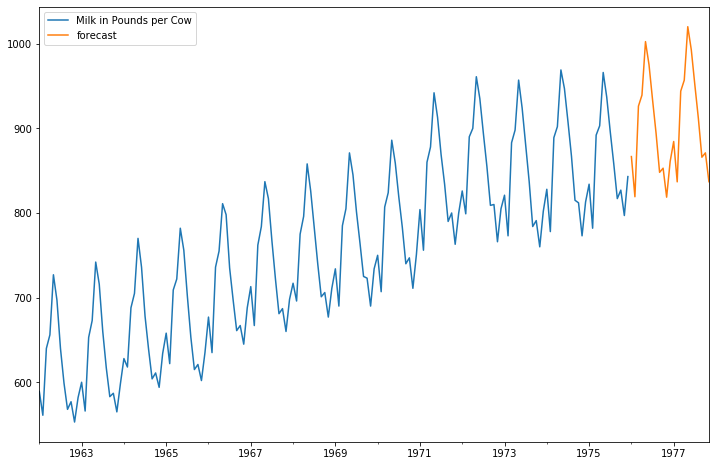

In [51]:
future_df['forecast'] = results.predict(start = 168, end = 192, dynamic= True)  
future_df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(12, 8)) 